# Linear Models

In [ ]:
import numpy as np
from sklearn import linear_model, svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Perceptron, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression()

In [ ]:
reg.coef_

array([0.5, 0.5])

In [ ]:
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [ ]:
reg.coef_

array([0.34545455, 0.34545455])

In [ ]:
reg.intercept_

np.float64(0.13636363636363638)

In [ ]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [ ]:
reg.alpha_

np.float64(0.01)

In [ ]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1)

In [ ]:
reg.predict([[1,1]])

array([0.8])

In [ ]:
reg = linear_model.LassoLars(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

LassoLars(alpha=0.1)

In [ ]:
reg.coef_

array([0.6, 0. ])

In [ ]:
X = [[0,0],[1,1],[2,2],[3,3]]
Y = [0,1,2,3]
reg = linear_model.BayesianRidge()
reg.fit(X,Y)

BayesianRidge()

In [ ]:
reg.predict([[1,0]])

array([0.50000013])

In [ ]:
reg.coef_

array([0.49999993, 0.49999993])

In [ ]:
reg = linear_model.TweedieRegressor(alpha=0.5, power=1.0, link='log')
reg.fit([[0,0],[0,1],[2,2]],[0,1,2])

TweedieRegressor(alpha=0.5, link='log', power=1.0)

In [ ]:
reg.coef_

array([0.24631611, 0.43370317])

In [ ]:
reg.intercept_

np.float64(-0.7638091359123443)

In [ ]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
model= Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

In [ ]:
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = X[:, 0] ^ X[:, 1]
y

array([0, 0, 1, 1])

In [ ]:
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X

array([[1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 0, 0],
       [1, 0, 1, 0]])

In [ ]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(X, y)

In [ ]:
clf.predict(X)

array([0, 0, 1, 1])

In [ ]:
clf.score(X,y)

1.0

# 1.2 Linear and Quadratic Discriminant Analysis

![Linear and Quadratic Discriminant Analysis](https://scikit-learn.org/stable/_images/sphx_glr_plot_lda_qda_001.png)

# 1.3 Kernel Ridge Regression

![Kernel Ridge Regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_ridge_regression_001.png)

# 1.4 Support Vector Machines

![Support Vector Machines](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

In [ ]:
from sklearn import svm
X = [[0,0],[1,1]]
y = [0,1]
clf = svm.SVC()
clf.fit(X,y)

SVC()

In [ ]:
clf.predict([[2,2]])

array([1])

In [ ]:
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [ ]:
clf.support_

array([0, 1], dtype=int32)

In [ ]:
clf.n_support_

array([1, 1], dtype=int32)

In [ ]:
X = [[0],[1],[2],[3]]
Y = [0,1,2,3]

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X,Y)

SVC(decision_function_shape='ovo')

In [ ]:
dec = clf.decision_function([[1]])
dec.shape[1]

6

In [ ]:
clf.decision_function_shape = 'ovr'
dec = clf.decision_function([[1]])
dec.shape[1]

4

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X,Y)

LinearSVC()

In [ ]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

In [ ]:
X = [[0,0],[2,2]]
y = [0.5,2.5]

regr = svm.SVR()
regr.fit(X,y)

SVR()

In [ ]:
regr.predict([[1,1]])

array([1.5])

In [ ]:
clf = make_pipeline(StandardScaler(), SVC())

In [ ]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [ ]:
import numpy as np
from sklearn import svm

def my_kernel(X,Y):
  return np.dot(X,Y.T)

clf = svm.SVC(kernel=my_kernel)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm

X,y = make_classification(n_features=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
clf = svm.SVC(kernel='precomputed')
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)

SVC(kernel='precomputed')

In [ ]:
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1])

# 1.5 Stochastic Gradient Descent

![Stochastic Gradient Descent](https://scikit-learn.org/stable/_images/sphx_glr_plot_sgd_iris_001.png)

In [ ]:
X = [[0,0],[1,1]]
y = [0,1]

clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, max_iter=5)
clf.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [ ]:
clf.predict([[2,2]])

array([1])

In [ ]:
clf.coef_

array([[9.91080278, 9.91080278]])

In [ ]:
clf.intercept_

array([-9.97004991])

In [ ]:
clf.decision_function([[2,2]])

array([29.67316119])

In [ ]:
clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, max_iter=5)
clf.fit(X,y)
clf.predict_proba([[1,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[4.97248476e-07, 9.99999503e-01]])

In [ ]:
X_train = X
X_test = y
y_train = y

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X)
X_test = scaler.transform(X)

In [ ]:
from sklearn.pipeline import make_pipeline
est = make_pipeline(StandardScaler(), SGDClassifier())
est.fit(X_train, y_train)
est.predict(X_test)

array([0, 1])

# 1.6 Nearest Neighbors

![Nearest Neighbors](https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [ ]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [ ]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

In [ ]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X,k=2,return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [ ]:
from sklearn.neighbors import KDTree, BallTree

In [ ]:
KDTree.valid_metrics

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity']

In [ ]:
BallTree.valid_metrics

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity',
 'seuclidean',
 'mahalanobis',
 'hamming',
 'canberra',
 'braycurtis',
 'jaccard',
 'dice',
 'rogerstanimoto',
 'russellrao',
 'sokalmichener',
 'sokalsneath',
 'haversine',
 'pyfunc']

In [ ]:
from sklearn.neighbors import NearestCentroid

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([1,1,1,2,2,2])

clf = NearestCentroid()
clf.fit(X,y)

NearestCentroid()

In [ ]:
print(clf.predict([[-0.8,-1]]))

[1]


In [ ]:
import tempfile
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression

In [ ]:
cache_path = tempfile.gettempdir()
X, _ = make_regression(n_samples=50, n_features=25, random_state=0)
estimator = make_pipeline(
    KNeighborsTransformer(mode='distance'),
    Isomap(n_components=3,metric='precomputed'),
    memory=cache_path)
X_embedded= estimator.fit_transform(X)
X_embedded.shape

(50, 3)

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.7,random_state=42)

In [ ]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca',nca),('knn',knn)])
nca_pipe.fit(X_train,y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
print(nca_pipe.score(X_test,y_test))

0.9619047619047619


# 1.7 Gaussian Processes

![Gaussian Processes](https://scikit-learn.org/stable/_images/sphx_glr_plot_gpr_noisy_targets_003.png)

In [ ]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [ ]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)) + RBF(2, (1e-2, 1e2))

In [ ]:
for hyperparameter in kernel.hyperparameters: print(hyperparameter)

Hyperparameter(name='k1__k1__constant_value', value_type='numeric', bounds=array([[1.e-03, 1.e+03]]), n_elements=1, fixed=False)
Hyperparameter(name='k1__k2__length_scale', value_type='numeric', bounds=array([[1.e-02, 1.e+02]]), n_elements=1, fixed=False)
Hyperparameter(name='k2__length_scale', value_type='numeric', bounds=array([[1.e-02, 1.e+02]]), n_elements=1, fixed=False)


In [ ]:
params = kernel.get_params()
params

{'k1': 1**2 * RBF(length_scale=0.5),
 'k2': RBF(length_scale=2),
 'k1__k1': 1**2,
 'k1__k2': RBF(length_scale=0.5),
 'k1__k1__constant_value': 1.0,
 'k1__k1__constant_value_bounds': (0.001, 1000.0),
 'k1__k2__length_scale': 0.5,
 'k1__k2__length_scale_bounds': (0.01, 100.0),
 'k2__length_scale': 2,
 'k2__length_scale_bounds': (0.01, 100.0)}

In [ ]:
print(kernel.theta)

[ 0.         -0.69314718  0.69314718]


In [ ]:
print(kernel.bounds)

[[-6.90775528  6.90775528]
 [-4.60517019  4.60517019]
 [-4.60517019  4.60517019]]


# 1.8 Cross decomposition

![Cross decomposition](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_cross_decomposition_001.png)

# 1.9 Naive Bayes

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(X_train,y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points: 4


# 1.10 Decision Trees

![Decision Trees](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

In [ ]:
from sklearn import tree

X = [[0,0],[1,1]]
Y = [0,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [ ]:
clf.predict([[2,2]])

array([1])

In [ ]:
clf.predict_proba([[2,2]])

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

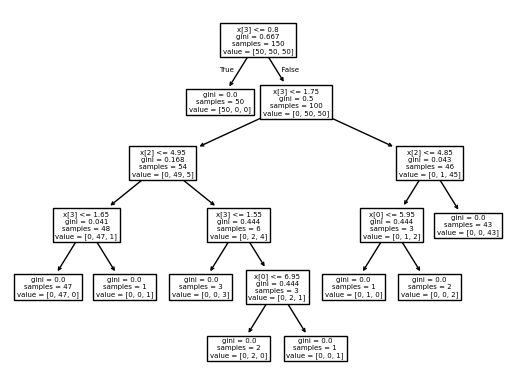

In [ ]:
tree.plot_tree(clf)

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

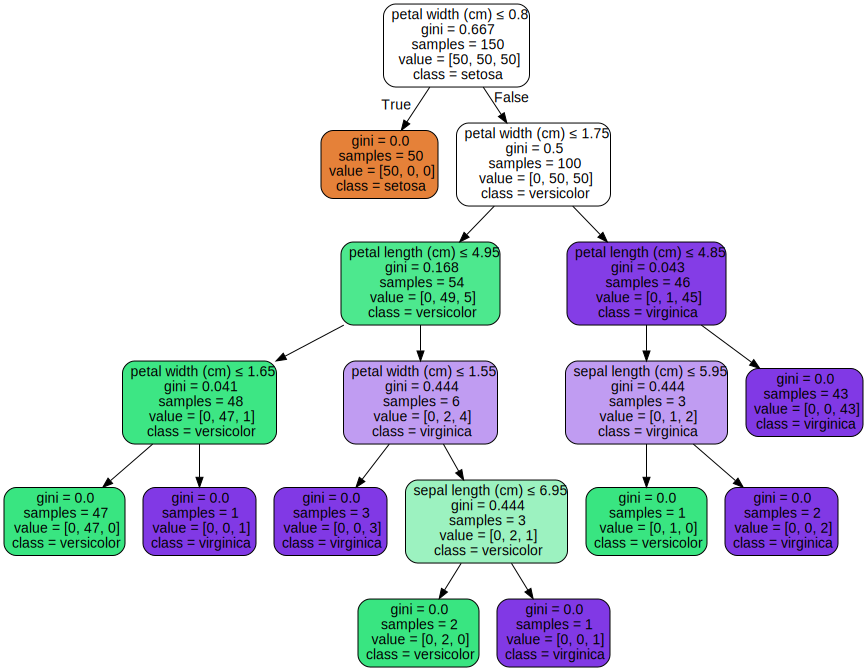

In [ ]:
dot_data = tree.export_graphviz(clf,out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)

r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [ ]:
from sklearn import tree

X = [[0,0],[2,2]]
y = [0.5,2.5]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([0,1,6,np.nan]).reshape(-1,1)
y= [0,0,1,1]

tree = DecisionTreeClassifier(random_state=0).fit(X,y)
tree.predict(X)

array([0, 0, 1, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([np.nan,-1,np.nan,1]).reshape(-1,1)
y = [0,0,1,1]

tree = DecisionTreeClassifier(random_state=0).fit(X,y)
X_test = np.array([np.nan]).reshape(-1,1)
tree.predict(X_test)

array([1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = np.array([0,1,2,3]).reshape(-1,1)
y = [0,1,1,1]

tree = DecisionTreeClassifier(random_state=0).fit(X,y)
X_test = np.array([np.nan]).reshape(-1,1)
tree.predict(X_test)

array([1])

# 1.11. Ensembles: Gradient boosting, random forests, bagging, voting, stacking

![Ensembles: Gradient boosting, random forests, bagging, voting, stacking](https://scikit-learn.org/stable/_images/sphx_glr_plot_forest_iris_001.png)

In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

In [2]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [3]:
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8965

In [4]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

In [5]:
X = np.array([0, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 0, 1, 1]

In [6]:
gbdt = HistGradientBoostingClassifier(min_samples_leaf=1).fit(X, y)
gbdt.predict(X)

array([0, 0, 1, 1])

In [7]:
X = np.array([0, np.nan, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 1, 0, 0, 1]

In [8]:
gbdt = HistGradientBoostingClassifier(min_samples_leaf=1,
                                      max_depth=2,
                                      learning_rate=1,
                                      max_iter=1).fit(X, y)

In [10]:
gbdt.predict(X)

array([0, 1, 0, 0, 1])

In [11]:
X = [[1, 0],
     [1, 0],
     [1, 0],
     [0, 1]]
y = [0, 0, 1, 0]

In [12]:
sample_weight = [0, 0, 1, 1]
gb = HistGradientBoostingClassifier(min_samples_leaf=1)
gb.fit(X, y, sample_weight=sample_weight)

HistGradientBoostingClassifier(min_samples_leaf=1)

In [13]:
gb.predict([[1,0]])

array([1])

In [14]:
gb.predict_proba([[1,0]])[0,1]

np.float64(0.9990209190235209)

In [15]:
gbdt = HistGradientBoostingClassifier(categorical_features=[True, False])

In [16]:
gbdt = HistGradientBoostingClassifier(categorical_features=[0])

In [17]:
gbdt = HistGradientBoostingClassifier(categorical_features=["site", "manufacturer"])

In [18]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [19]:
gbdt = HistGradientBoostingRegressor(monotonic_cst=[1, -1, 0])

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error'
)
est = est.fit(X_train, y_train)  # fit with 100 trees
mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

In [23]:
_ = est.set_params(n_estimators=200, warm_start=True)  # set warm_start and increase num of trees
_ = est.fit(X_train, y_train) # fit additional 100 trees to est
mean_squared_error(y_test, est.predict(X_test))

3.840234741105356

In [25]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
clf.feature_importances_

array([0.10684213, 0.10461707, 0.11265447, 0.09863589, 0.09469133,
       0.10729306, 0.09163753, 0.09718194, 0.09581415, 0.09063242])

In [27]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

np.float64(0.9823000000000001)

In [30]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

np.float64(0.9997)

In [31]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

np.True_

In [32]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [33]:
X, y = make_classification(n_samples=100, random_state=1)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)  # fit with 10 trees
len(clf.estimators_)

10

In [34]:
_ = clf.set_params(n_estimators=20, warm_start=True)
_ = clf.fit(X, y) # fit additional 10 trees
len(clf.estimators_)

20

In [35]:
clf = RandomForestClassifier(n_estimators=20)  # set `n_estimators` to 10 + 10
_ = clf.fit(X, y)  # fit `estimators_` will be the same as `clf` above

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

In [37]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [38]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [44]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [46]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

In [47]:
clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

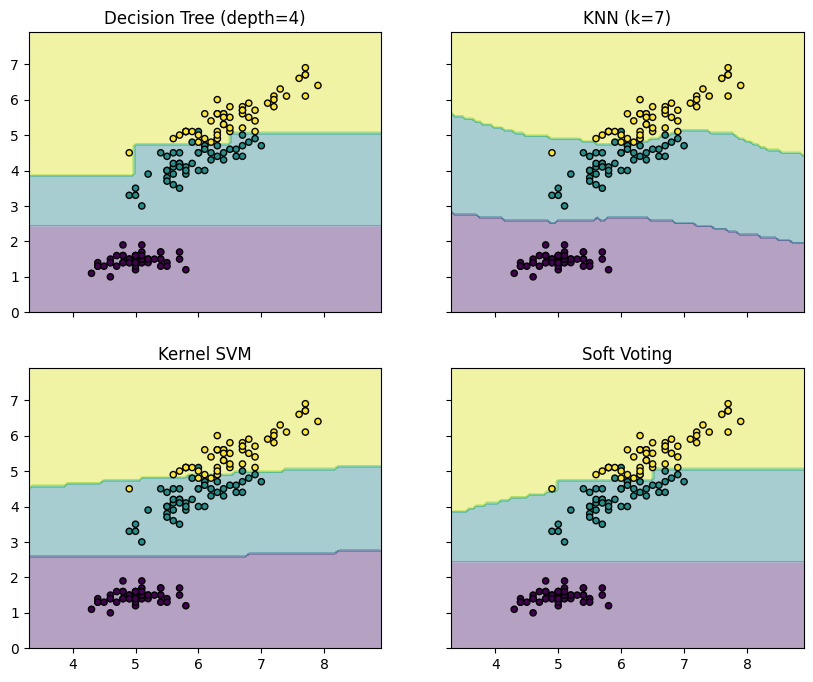

In [48]:
# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [49]:
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft'
)

In [50]:
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft', weights=[2,5,1]
)

In [51]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft'
)

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
X, y = load_diabetes(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

reg1 = reg1.fit(X, y)
reg2 = reg2.fit(X, y)
reg3 = reg3.fit(X, y)
ereg = ereg.fit(X, y)

In [54]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

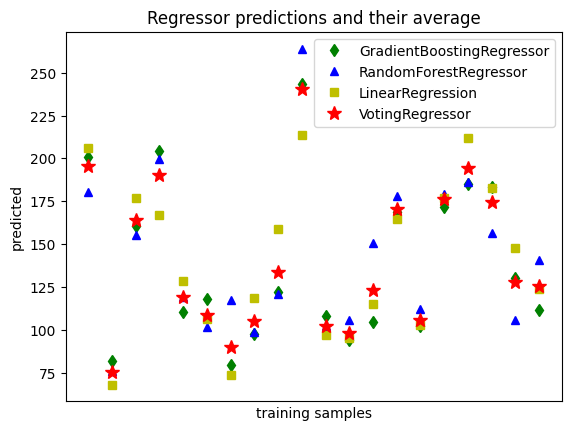

In [55]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [56]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [58]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

In [59]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.53


In [60]:
reg.transform(X_test[:5])

array([[142.36209608, 138.30724927, 146.1       ],
       [179.700576  , 182.89812552, 151.75      ],
       [139.89817956, 132.46803343, 158.25      ],
       [286.95180286, 292.65695767, 225.4       ],
       [126.88317154, 124.1215975 , 164.65      ]])

In [61]:
final_layer_rfr = RandomForestRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer_gbr = GradientBoostingRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer = StackingRegressor(
    estimators=[('rf', final_layer_rfr),
                ('gbrt', final_layer_gbr)],
    final_estimator=RidgeCV()
    )
multi_layer_regressor = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
                ('lasso', LassoCV(random_state=42)),
                ('knr', KNeighborsRegressor(n_neighbors=20,
                                            metric='euclidean'))],
    final_estimator=final_layer
)
multi_layer_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=StackingRegressor(estimators=[('rf',
                                                                 RandomForestRegressor(max_features=1,
                                                                                       max_leaf_nodes=5,
                                                                                       n_estimators=10,
                                                                                       random_state=42)),
                                                                ('gbrt',
                                                                 GradientBoostingRegressor(max_features=1,
                                                                                           max_leaf_nodes=5,
                                                                                           n_estimators=10,
                                                                                           random_state=42))],
                                                    final_estimator=RidgeCV()))

In [62]:
print('R2 score: {:.2f}'
      .format(multi_layer_regressor.score(X_test, y_test)))

R2 score: 0.53


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

np.float64(0.9533333333333334)

# 1.12. Multiclass and multioutput algorithms

In [64]:
import numpy as np
y = np.array(['apple', 'pear', 'apple', 'orange'])
print(y)

['apple' 'pear' 'apple' 'orange']


In [65]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
y = np.array(['apple', 'pear', 'apple', 'orange'])
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


In [66]:
from scipy import sparse
y_sparse = sparse.csr_matrix(y_dense)
print(y_sparse)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 3)>
  Coords	Values
  (0, 0)	1
  (1, 2)	1
  (2, 0)	1
  (3, 1)	1


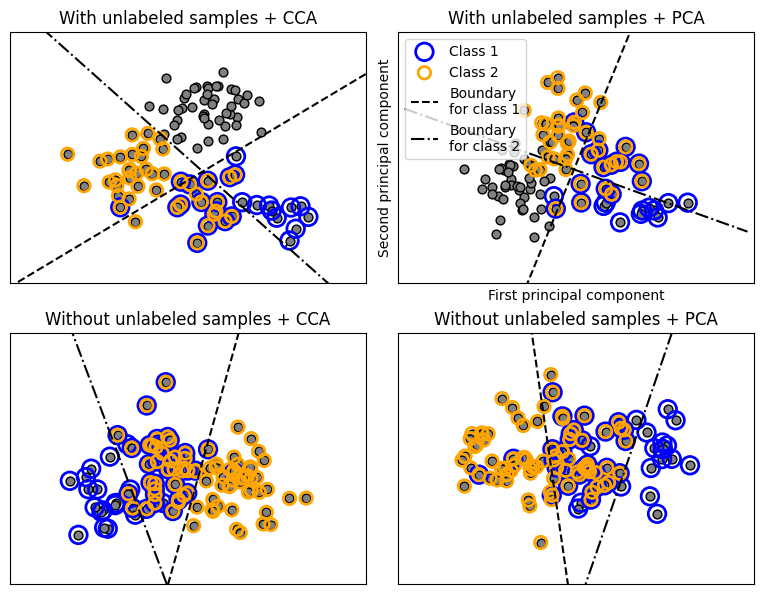

In [68]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hyperplane(
        classif.estimators_[0], min_x, max_x, "k--", "Boundary\nfor class 1"
    )
    plot_hyperplane(
        classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=False, random_state=1
)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()

In [67]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
clf = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
clf.fit(X, y).predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
y = np.array([[1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0]])
print(y)

[[1 0 0 1]
 [0 0 1 1]
 [0 0 0 0]]


In [72]:
y_sparse = sparse.csr_matrix(y)
print(y_sparse)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (3, 4)>
  Coords	Values
  (0, 0)	1
  (0, 3)	1
  (1, 2)	1
  (1, 3)	1


In [73]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y1 = make_classification(n_samples=10, n_features=100,
                            n_informative=30, n_classes=3,
                            random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

In [74]:
y = np.array([['apple', 'green'], ['orange', 'orange'], ['pear', 'green']])
print(y)

[['apple' 'green']
 ['orange' 'orange']
 ['pear' 'green']]


In [76]:
y = np.array([[31.4, 94], [40.5, 109], [25.0, 30]])
print(y)

[[ 31.4  94. ]
 [ 40.5 109. ]
 [ 25.   30. ]]


In [77]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

# 1.13. Feature selection

In [78]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [81]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [82]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [83]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape
(150, 4)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(150, 3)

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [92]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.07773837, 0.0729412 , 0.4396829 , 0.40963753])

In [93]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [94]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(penalty='l1'))),
                ('classification', RandomForestClassifier())])

# 1.14. Semi-supervised learning

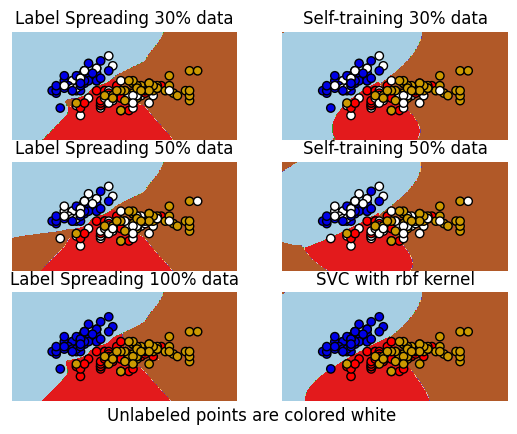

In [96]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = 0.02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

# 1.15. Isotonic regression

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))

In [98]:
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

LinearRegression()

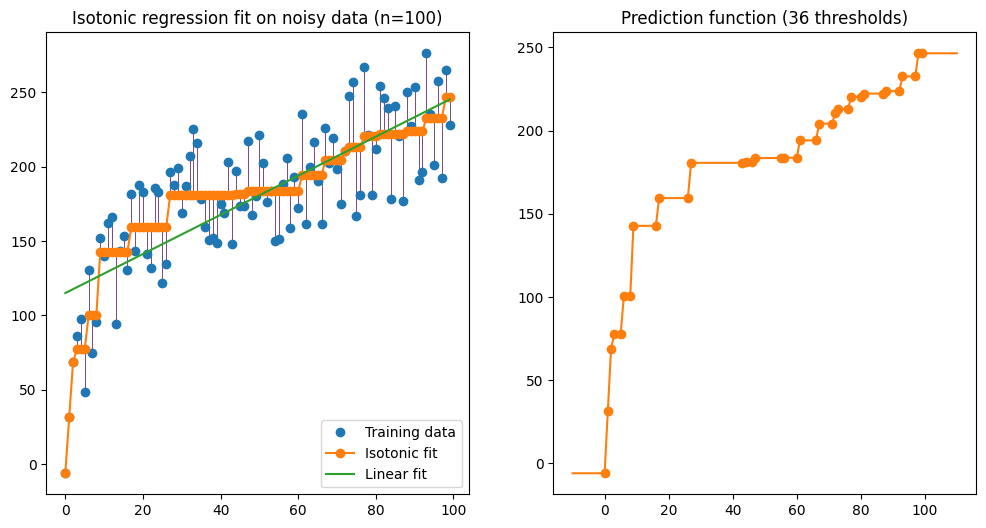

In [99]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, "C0.", markersize=12)
ax0.plot(x, y_, "C1.-", markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), "C2-")
ax0.add_collection(lc)
ax0.legend(("Training data", "Isotonic fit", "Linear fit"), loc="lower right")
ax0.set_title("Isotonic regression fit on noisy data (n=%d)" % n)

x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), "C1-")
ax1.plot(ir.X_thresholds_, ir.y_thresholds_, "C1.", markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))

plt.show()

# 1.16. Probability calibration

In [116]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=2, random_state=42
)

train_samples = 100  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=False,
    test_size=100_000 - train_samples,
)

In [117]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [118]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB

In [119]:
lr = LogisticRegressionCV(
    Cs=np.logspace(-6, 6, 101), cv=10, scoring="neg_log_loss", max_iter=1_000
)
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier(random_state=42)

clf_list = [
    (lr, "Logistic Regression"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]

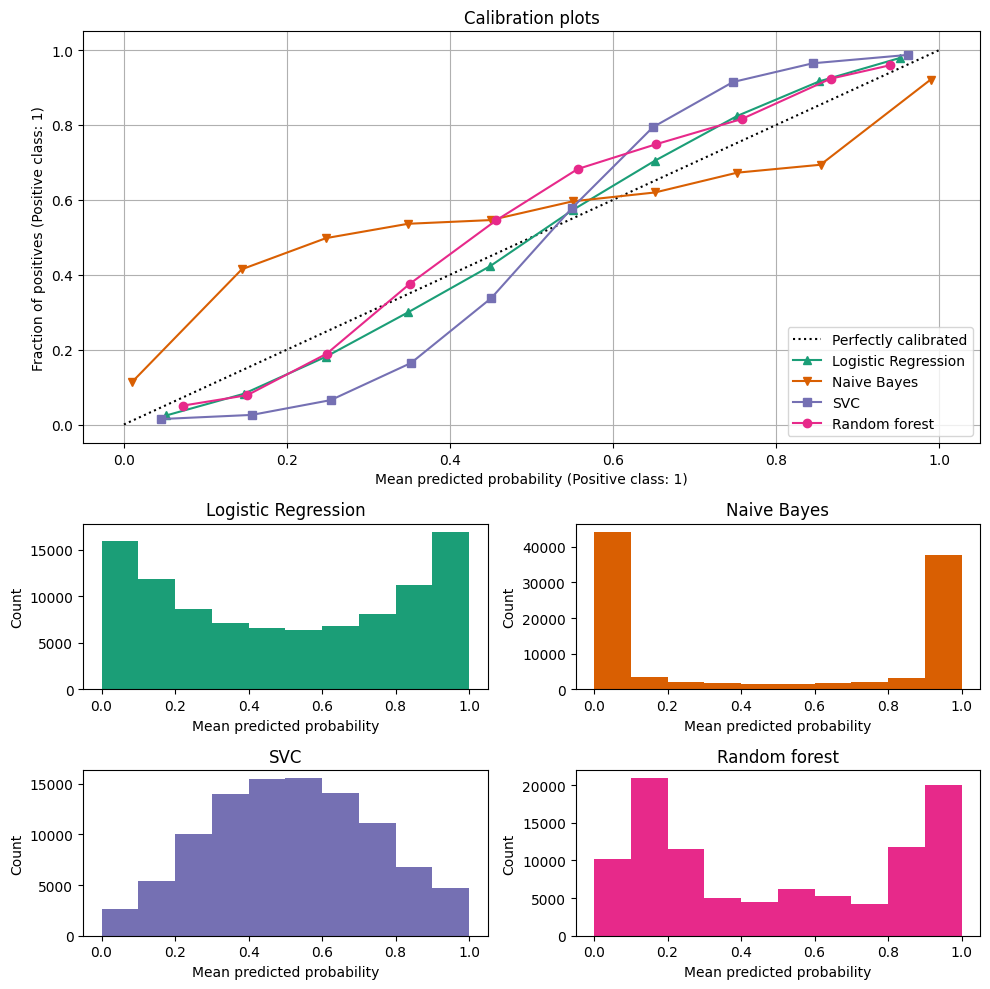

In [120]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# 1.17. Neural network models (supervised)

![MLP](https://scikit-learn.org/stable/_images/multilayerperceptron_network.png)

In [126]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [122]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [123]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [124]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [125]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

In [110]:
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [111]:
clf.predict([[1., 2.]])

array([[1, 1]])

In [112]:
clf.predict([[0., 0.]])

array([[0, 1]])

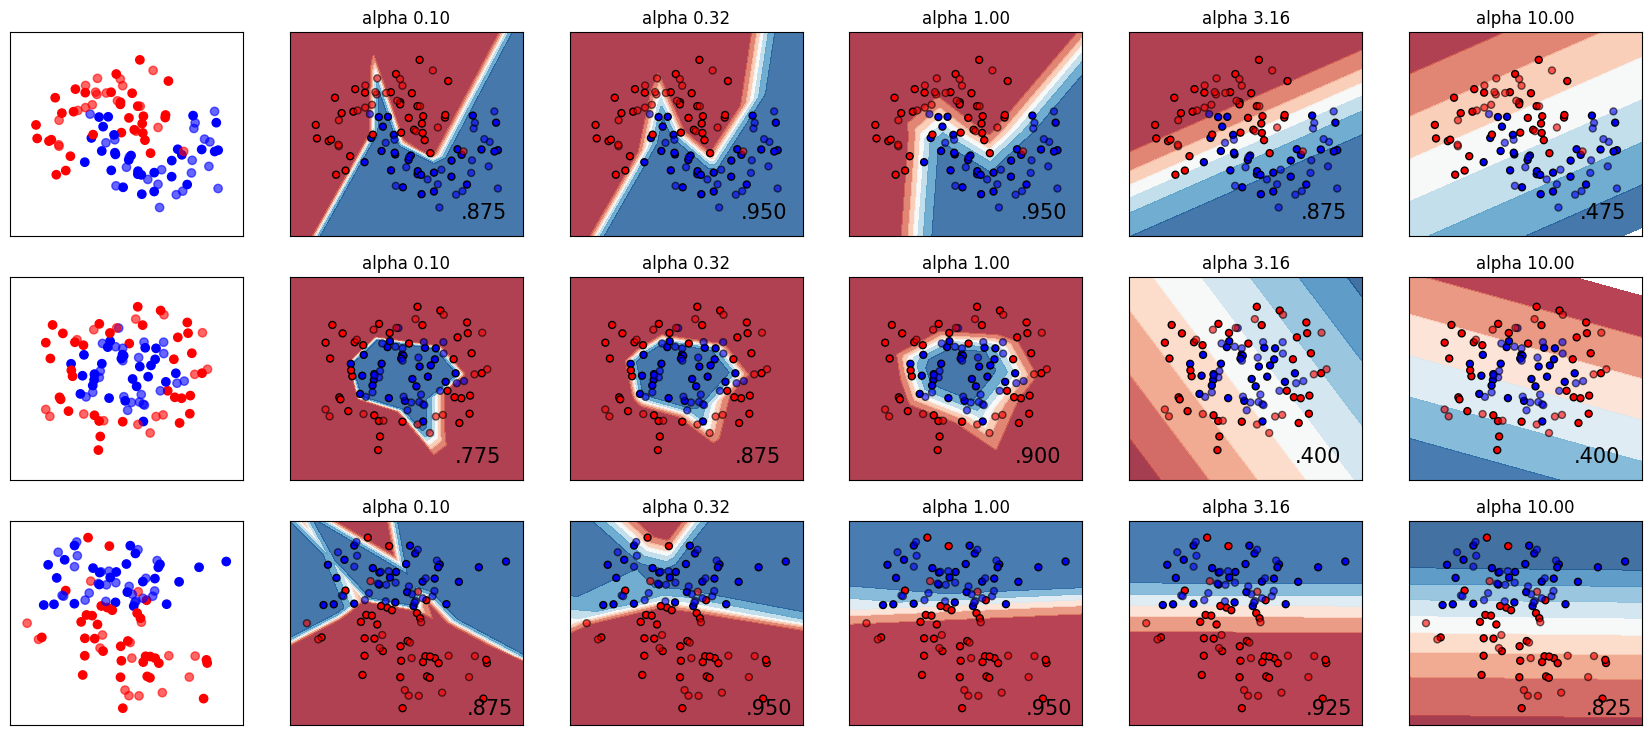

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [115]:
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)
for i in range(10):
    clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691